# Medical Diagnosis with Support Vector Machines


### Loading Libraries


In [26]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import pandas as pd
import numpy as np

plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['font.size'] = 18

### Loading Data

In [14]:
column_names = ["pregnancies", "glucose", "bpressure", "skinfold", "insulin", "bmi", "pedigree", "age", "class"]
med_data = pd.read_csv('med_data.csv', names = column_names)
med_data

,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [15]:
column_names.remove('class')
features = column_names
X = med_data[features]

In [18]:
y = med_data['class']

### Exploratory Data Analysis

In [19]:
med_data.describe()

,pregnancies,glucose,bpressure,skinfold,insulin,bmi,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [22]:
med_data.dtypes

pregnancies      int64
glucose          int64
bpressure        int64
skinfold         int64
insulin          int64
bmi            float64
pedigree       float64
age              int64
class            int64
dtype: object

In [23]:
med_data.isna().sum()

pregnancies    0
glucose        0
bpressure      0
skinfold       0
insulin        0
bmi            0
pedigree       0
age            0
class          0
dtype: int64

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

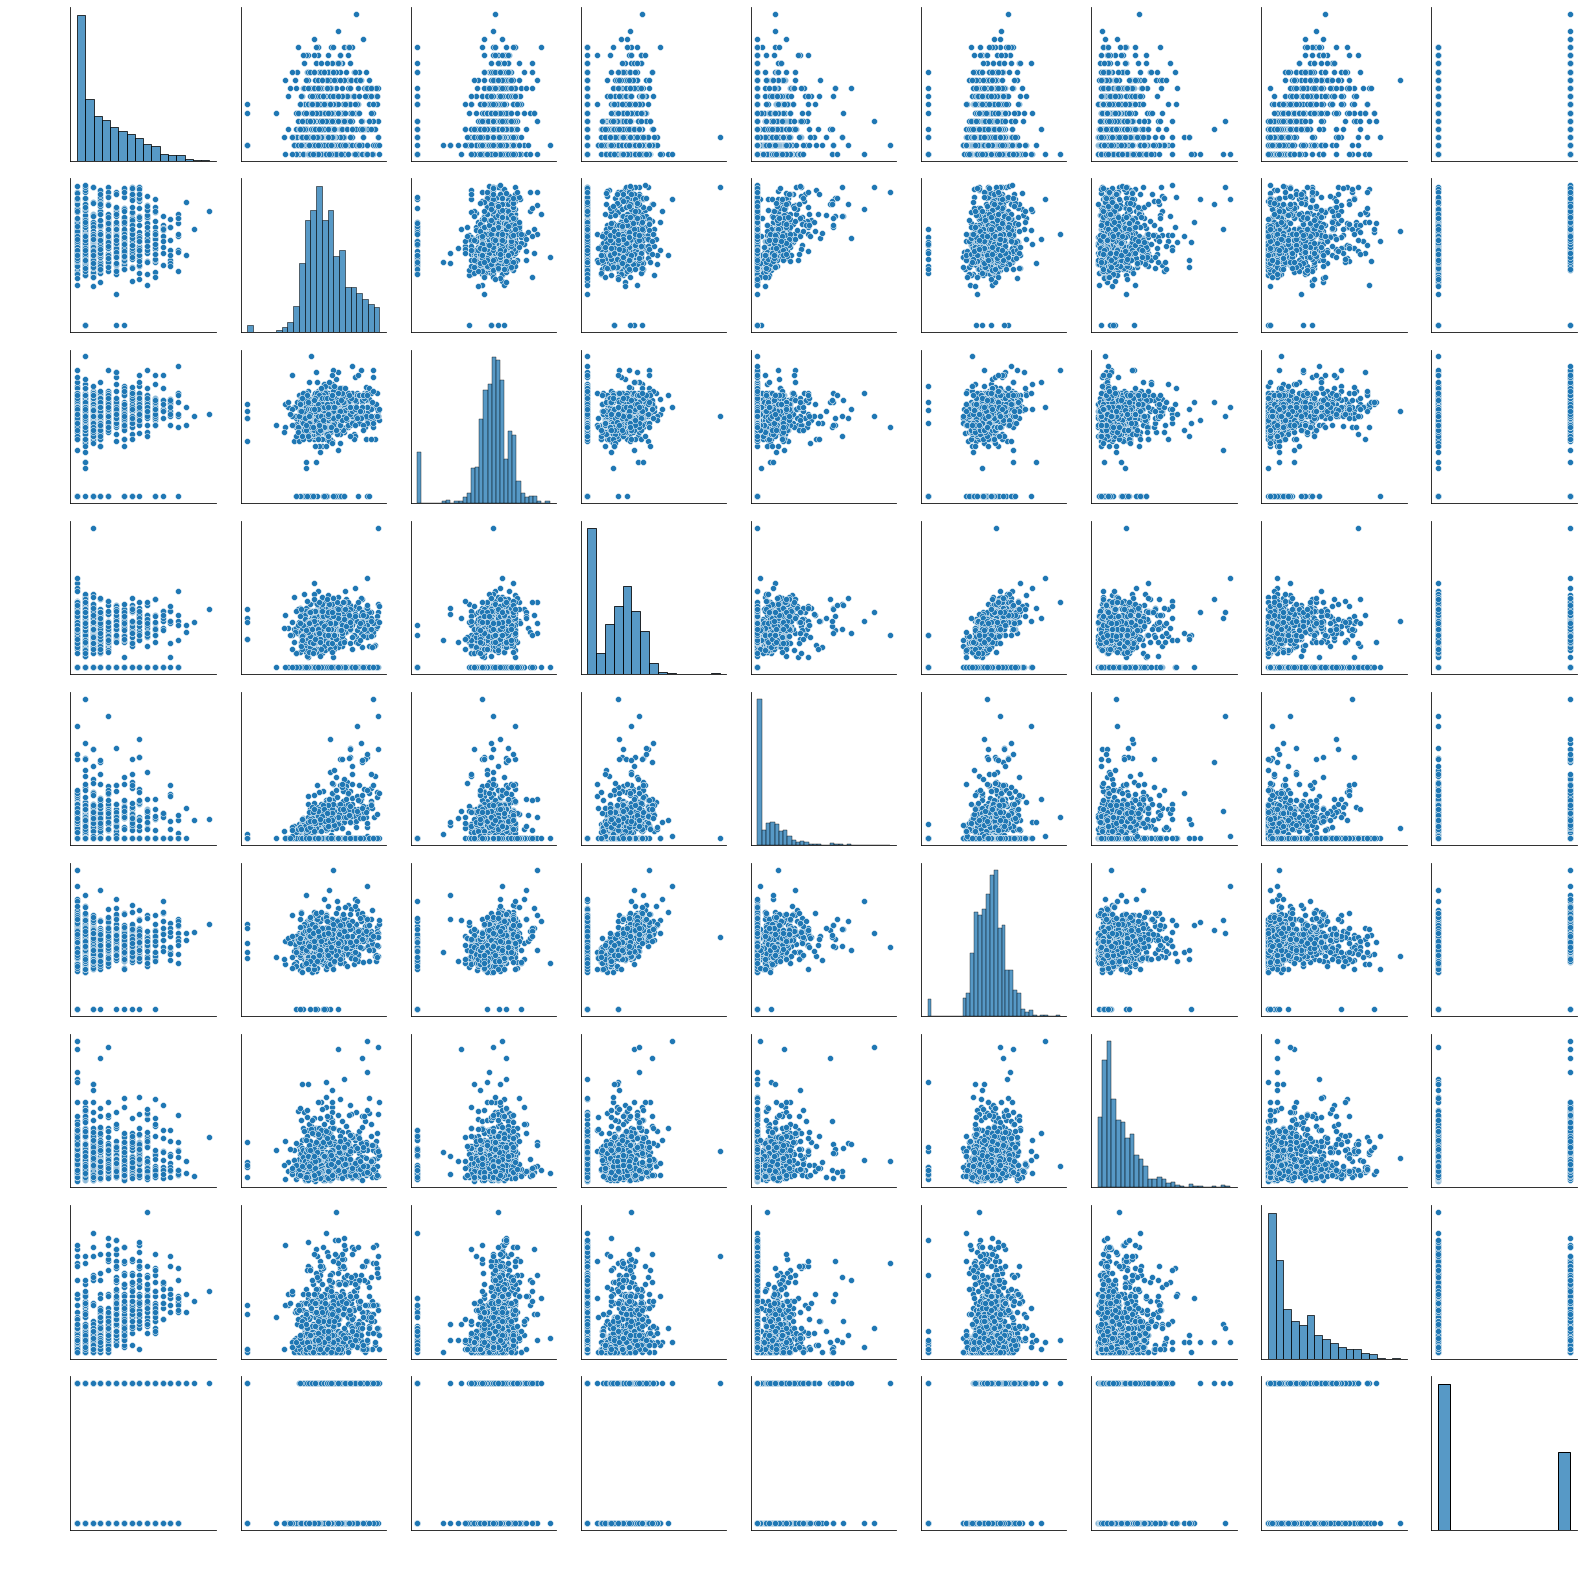

In [27]:
sns.pairplot(med_data)

### Model 


#### Split Dataset

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,random_state=51)
X_train.shape

(614, 8)

In [93]:
X_test.shape

(154, 8)

In [94]:
y_train.shape

(614,)

In [95]:
y_test.shape

(154,)

In [96]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)

### Training a Support Vector Machine


In [97]:
model = svm.SVC(kernel = 'rbf')
model.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [98]:
X_test = ss.transform(X_test)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.7337662337662337


In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.80        97
           1       0.69      0.51      0.59        57

    accuracy                           0.73       154
   macro avg       0.72      0.69      0.69       154
weighted avg       0.73      0.73      0.72       154

